In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()
sns.set_context('talk')

In [6]:
#2020
abortion = pd.read_csv("../raw_data/abortion_laws.csv", skiprows=2)
abortion = abortion.drop(columns=["Footnotes"])
abortion = abortion[1:52]
abortion.head()

,Location,Pre-Roe Abortion Ban Still State Law,State Law Expressing Intent to Limit Abortion to Maximum Extent Permitted,State Law Protecting the Right to Abortion
1,Alabama,Yes,No,No
2,Alaska,No,No,No
3,Arizona,Yes,No,No
4,Arkansas,Yes,Yes,No
5,California,No,No,Yes


In [7]:
#group into 3: significant restrictions on abortion, significant protections, neither
abortion['Abortion Overview'] = 0
abortion.loc[(abortion['Pre-Roe Abortion Ban Still State Law'] == 'Yes') | (abortion['State Law Expressing Intent to Limit Abortion to Maximum Extent Permitted'] == 'Yes'),'Abortion Overview'] = 'significantly restricted'
abortion.loc[(abortion['State Law Protecting the Right to Abortion'] == 'Yes'),'Abortion Overview'] = 'protected'
abortion.loc[(abortion['Abortion Overview'] == 0),'Abortion Overview'] = 'neither'
abortion.head()

,Location,Pre-Roe Abortion Ban Still State Law,State Law Expressing Intent to Limit Abortion to Maximum Extent Permitted,State Law Protecting the Right to Abortion,Abortion Overview
1,Alabama,Yes,No,No,significantly restricted
2,Alaska,No,No,No,neither
3,Arizona,Yes,No,No,significantly restricted
4,Arkansas,Yes,Yes,No,significantly restricted
5,California,No,No,Yes,protected


In [8]:
#2014
paid_leave = pd.read_csv("../raw_data/paid_leave_laws.csv", skiprows=1)
paid_leave = paid_leave.drop(["Unnamed: 6", "Unnamed: 7", "Unnamed: 8", "Unnamed: 9", "Unnamed: 10"], axis=1)
paid_leave = paid_leave[:51]
paid_leave.head()

,State,Temporary Disability Insurance Statewidea,Paid Leave (for FMLA Related Reasons)a,Paid Sick Daysb,Paid Leave Legislation Total Score,Rank
0,Alabama,No,No,No,0.0,12.0
1,Alaska,No,No,No,0.0,12.0
2,Arizona,No,No,No,0.0,12.0
3,Arkansas,No,No,No,0.0,12.0
4,California,Yes,Yes,State,2.0,1.0


In [9]:
df = abortion.merge(paid_leave, how='inner', left_on='Location', right_on="State")
df = df.drop('Location', axis=1)
df = df[['State','Abortion Overview','Paid Leave Legislation Total Score']]
#df[df['Paid Leave Legislation Total Score'] <= 0]['Paid Leave Legislation Total Score']
df.head()

,State,Abortion Overview,Paid Leave Legislation Total Score
0,Alabama,significantly restricted,0.0
1,Alaska,neither,0.0
2,Arizona,significantly restricted,0.0
3,Arkansas,significantly restricted,0.0
4,California,protected,2.0


<AxesSubplot:xlabel='Abortion Overview', ylabel='Paid Leave Legislation Total Score'>

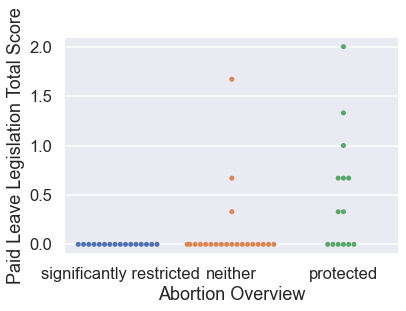

In [10]:
sns.swarmplot(data=df, x="Abortion Overview", y="Paid Leave Legislation Total Score")

States where abortion is protected tend to have better paid family/maternal leave legislation as well.

In [11]:
df.to_csv('../data/abortion-paid-leave.csv')